<a href="https://colab.research.google.com/github/Olufems/Datathon23/blob/main/EDA_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assessing Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ls

drive/  sample_data/


In [3]:
cd 'drive/My Drive'

/content/drive/My Drive


In [4]:
cd '/content/drive/MyDrive/DatafestAfrica/'

/content/drive/MyDrive/DatafestAfrica


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,6)})
pd.set_option('display.max_columns', 50)
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_csv('/content/drive/MyDrive/DatafestAfrica/FraudDetectionDataset1.csv')

In [7]:
df.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,Links,Tizen,Industrial & Scientific,68,Doctor,66826.21,Prefer Not to Say,Pro,In Transit,9.34,24.22,Daytime,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,Beaker,Windows Server,Beauty & Cosmetics,22,Chemist,89356.71,Genderqueer,Pending Approval,Resolved,65.28,55.11,Daytime,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,Opera,Android,Real Estate,71,Nurse,58438.63,Male,Pro,Posted,44.05,53.84,Daytime,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,Konqueror,CentOS,Appliances,78,Nurse,3426.92,Agender,Premium,Closed,21.70,21.62,Daytime,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,Basilisk,Ubuntu,Jewelry,31,Physicist,53080.12,Male,Free,Refunded,56.63,53.71,Daytime,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1


In [8]:
# Checking the size of the data
print(f"This dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

This dataset contains 6000000 rows and 32 columns


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 32 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Transaction ID                     int64  
 1   User ID                            int64  
 2   Transaction Amount                 float64
 3   Transaction Date and Time          object 
 4   Merchant ID                        int64  
 5   Payment Method                     object 
 6   Country Code                       object 
 7   Transaction Type                   object 
 8   Device Type                        object 
 9   IP Address                         object 
 10  Browser Type                       object 
 11  Operating System                   object 
 12  Merchant Category                  object 
 13  User Age                           int64  
 14  User Occupation                    object 
 15  User Income                        float64
 16  User Gender       

In [10]:
# Convert Transaction Date and Time column to datetime data type
df["Transaction Date and Time"] = pd.to_datetime(df["Transaction Date and Time"])

In [11]:
# Checking the feature types
print(f"This dataset contains {df.select_dtypes(include=['object']).shape[1]} categorical features and {df.select_dtypes(include=['int', 'float']).shape[1]} numerical features")

This dataset contains 18 categorical features and 13 numerical features


In [12]:
# Summary Statistics
df.describe(include='all')

<ipython-input-12-e0c513a4baef>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
count,6.000000e+06,6.000000e+06,6.000000e+06,6000000,6.000000e+06,6000000,6000000,6000000,6000000,6000000,6000000,6000000,6000000,6.000000e+06,6000000,6.000000e+06,6000000,6000000,6000000,6.000000e+06,6.000000e+06,6000000,6.000000e+06,6.000000e+06,6000000,6000000,6000000,6.000000e+06,6000000,6.000000e+06,6000000,6.000000e+06
unique,NaN,NaN,NaN,5783314,NaN,40,40,38,38,5995699,39,40,40,NaN,26,NaN,7,18,40,NaN,NaN,3,NaN,NaN,40,40,38,NaN,40,NaN,39,NaN
top,NaN,NaN,NaN,2021-03-13 20:34:16,NaN,Amazon Pay,HKG,Refund,Smart TV,189.94.101.16,Qutebrowser,Debian,Electronics,NaN,Salesperson,NaN,Male,Trial,In Progress,NaN,NaN,Nighttime,NaN,NaN,United States,ZAR,Invoice Payment,NaN,roadrunner.co.uk,NaN,Geolocation Verification,NaN
freq,NaN,NaN,NaN,5,NaN,150781,150917,300214,158697,3,300231,150732,150636,NaN,231511,NaN,858298,334960,151049,NaN,NaN,2001180,NaN,NaN,150845,150722,158411,NaN,150776,NaN,154728,NaN
first,NaN,NaN,NaN,2021-01-01 00:00:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2023-07-30 23:59:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.501906e+07,5.499571e+03,5.005515e+02,NaN,5.500817e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.900159e+01,NaN,5.049328e+04,NaN,NaN,NaN,5.050600e+01,3.049492e+01,NaN,5.048393e+01,2.999382e+00,NaN,NaN,NaN,5.749533e+02,NaN,1.049685e+01,NaN,4.999843e-01
std,2.598067e+07,2.598744e+03,2.884166e+02,NaN,2.598350e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.818538e+01,NaN,2.858223e+04,NaN,NaN,NaN,2.857562e+01,1.703567e+01,NaN,2.886705e+01,1.154479e+00,NaN,NaN,NaN,1.590197e+02,NaN,5.764884e+00,NaN,5.000000e-01
min,1.000004e+07,1.000000e+03,1.000000e+00,NaN,1.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.800000e+01,NaN,1.000020e+03,NaN,NaN,NaN,1.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,NaN,NaN,NaN,3.000000e+02,NaN,1.000000e+00,NaN,0.000000e+00
25%,3.251666e+07,3.248000e+03,2.507900e+02,NaN,3.251000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.300000e+01,NaN,2.573446e+04,NaN,NaN,NaN,2.576000e+01,1.574000e+01,NaN,2.500000e+01,2.000000e+00,NaN,NaN,NaN,4.370000e+02,NaN,5.000000e+00,NaN,0.000000e+00


In [13]:
# Check duplicated rows
df.duplicated().sum()

0

0    50.001567
1    49.998433
Name: Fraudulent Flag, dtype: float64


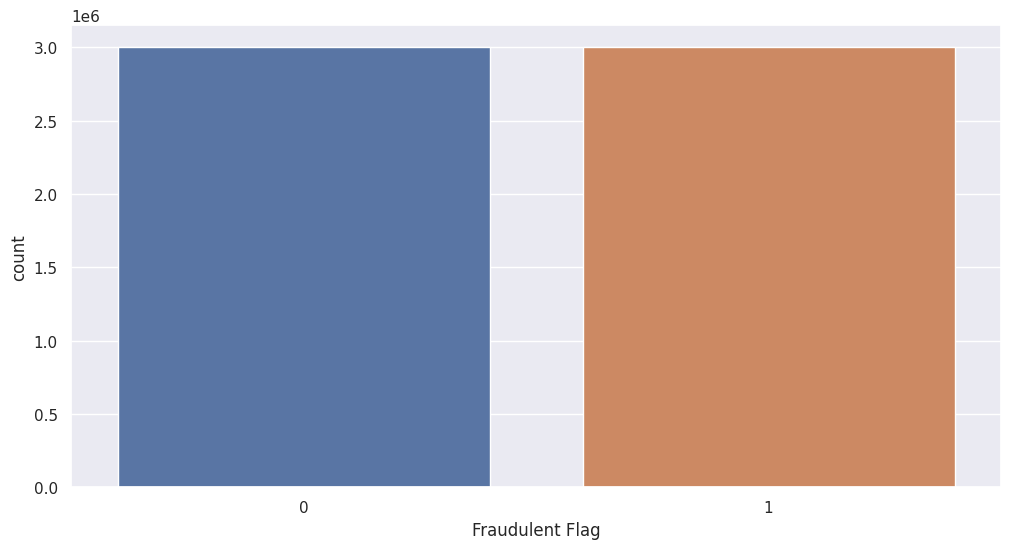

In [14]:
# Checking distribution of target Column
print(df["Fraudulent Flag"].value_counts(normalize=True) * 100)
sns.countplot(df, x="Fraudulent Flag");

In [15]:
# Checking cardinality of individual columns
df.nunique()

Transaction ID                       5805013
User ID                                 9000
Transaction Amount                     99901
Transaction Date and Time            5783314
Merchant ID                             9000
Payment Method                            40
Country Code                              40
Transaction Type                          38
Device Type                               38
IP Address                           5995699
Browser Type                              39
Operating System                          40
Merchant Category                         40
User Age                                  63
User Occupation                           26
User Income                          4498549
User Gender                                7
User Account Status                       18
Transaction Status                        40
Location Distance                       9901
Time Taken for Transaction              5901
Transaction Time of Day                    3
User's Tra

## Univariate Analysis

#### Categorical Variables

In [16]:
# Get categoral varible with unique values less than or equal to 40
cat_df_below_40 = df.select_dtypes(include=['object']).nunique()
selected_columns = cat_df_below_40[cat_df_below_40 <= 40]
cat_df = df[selected_columns.index]

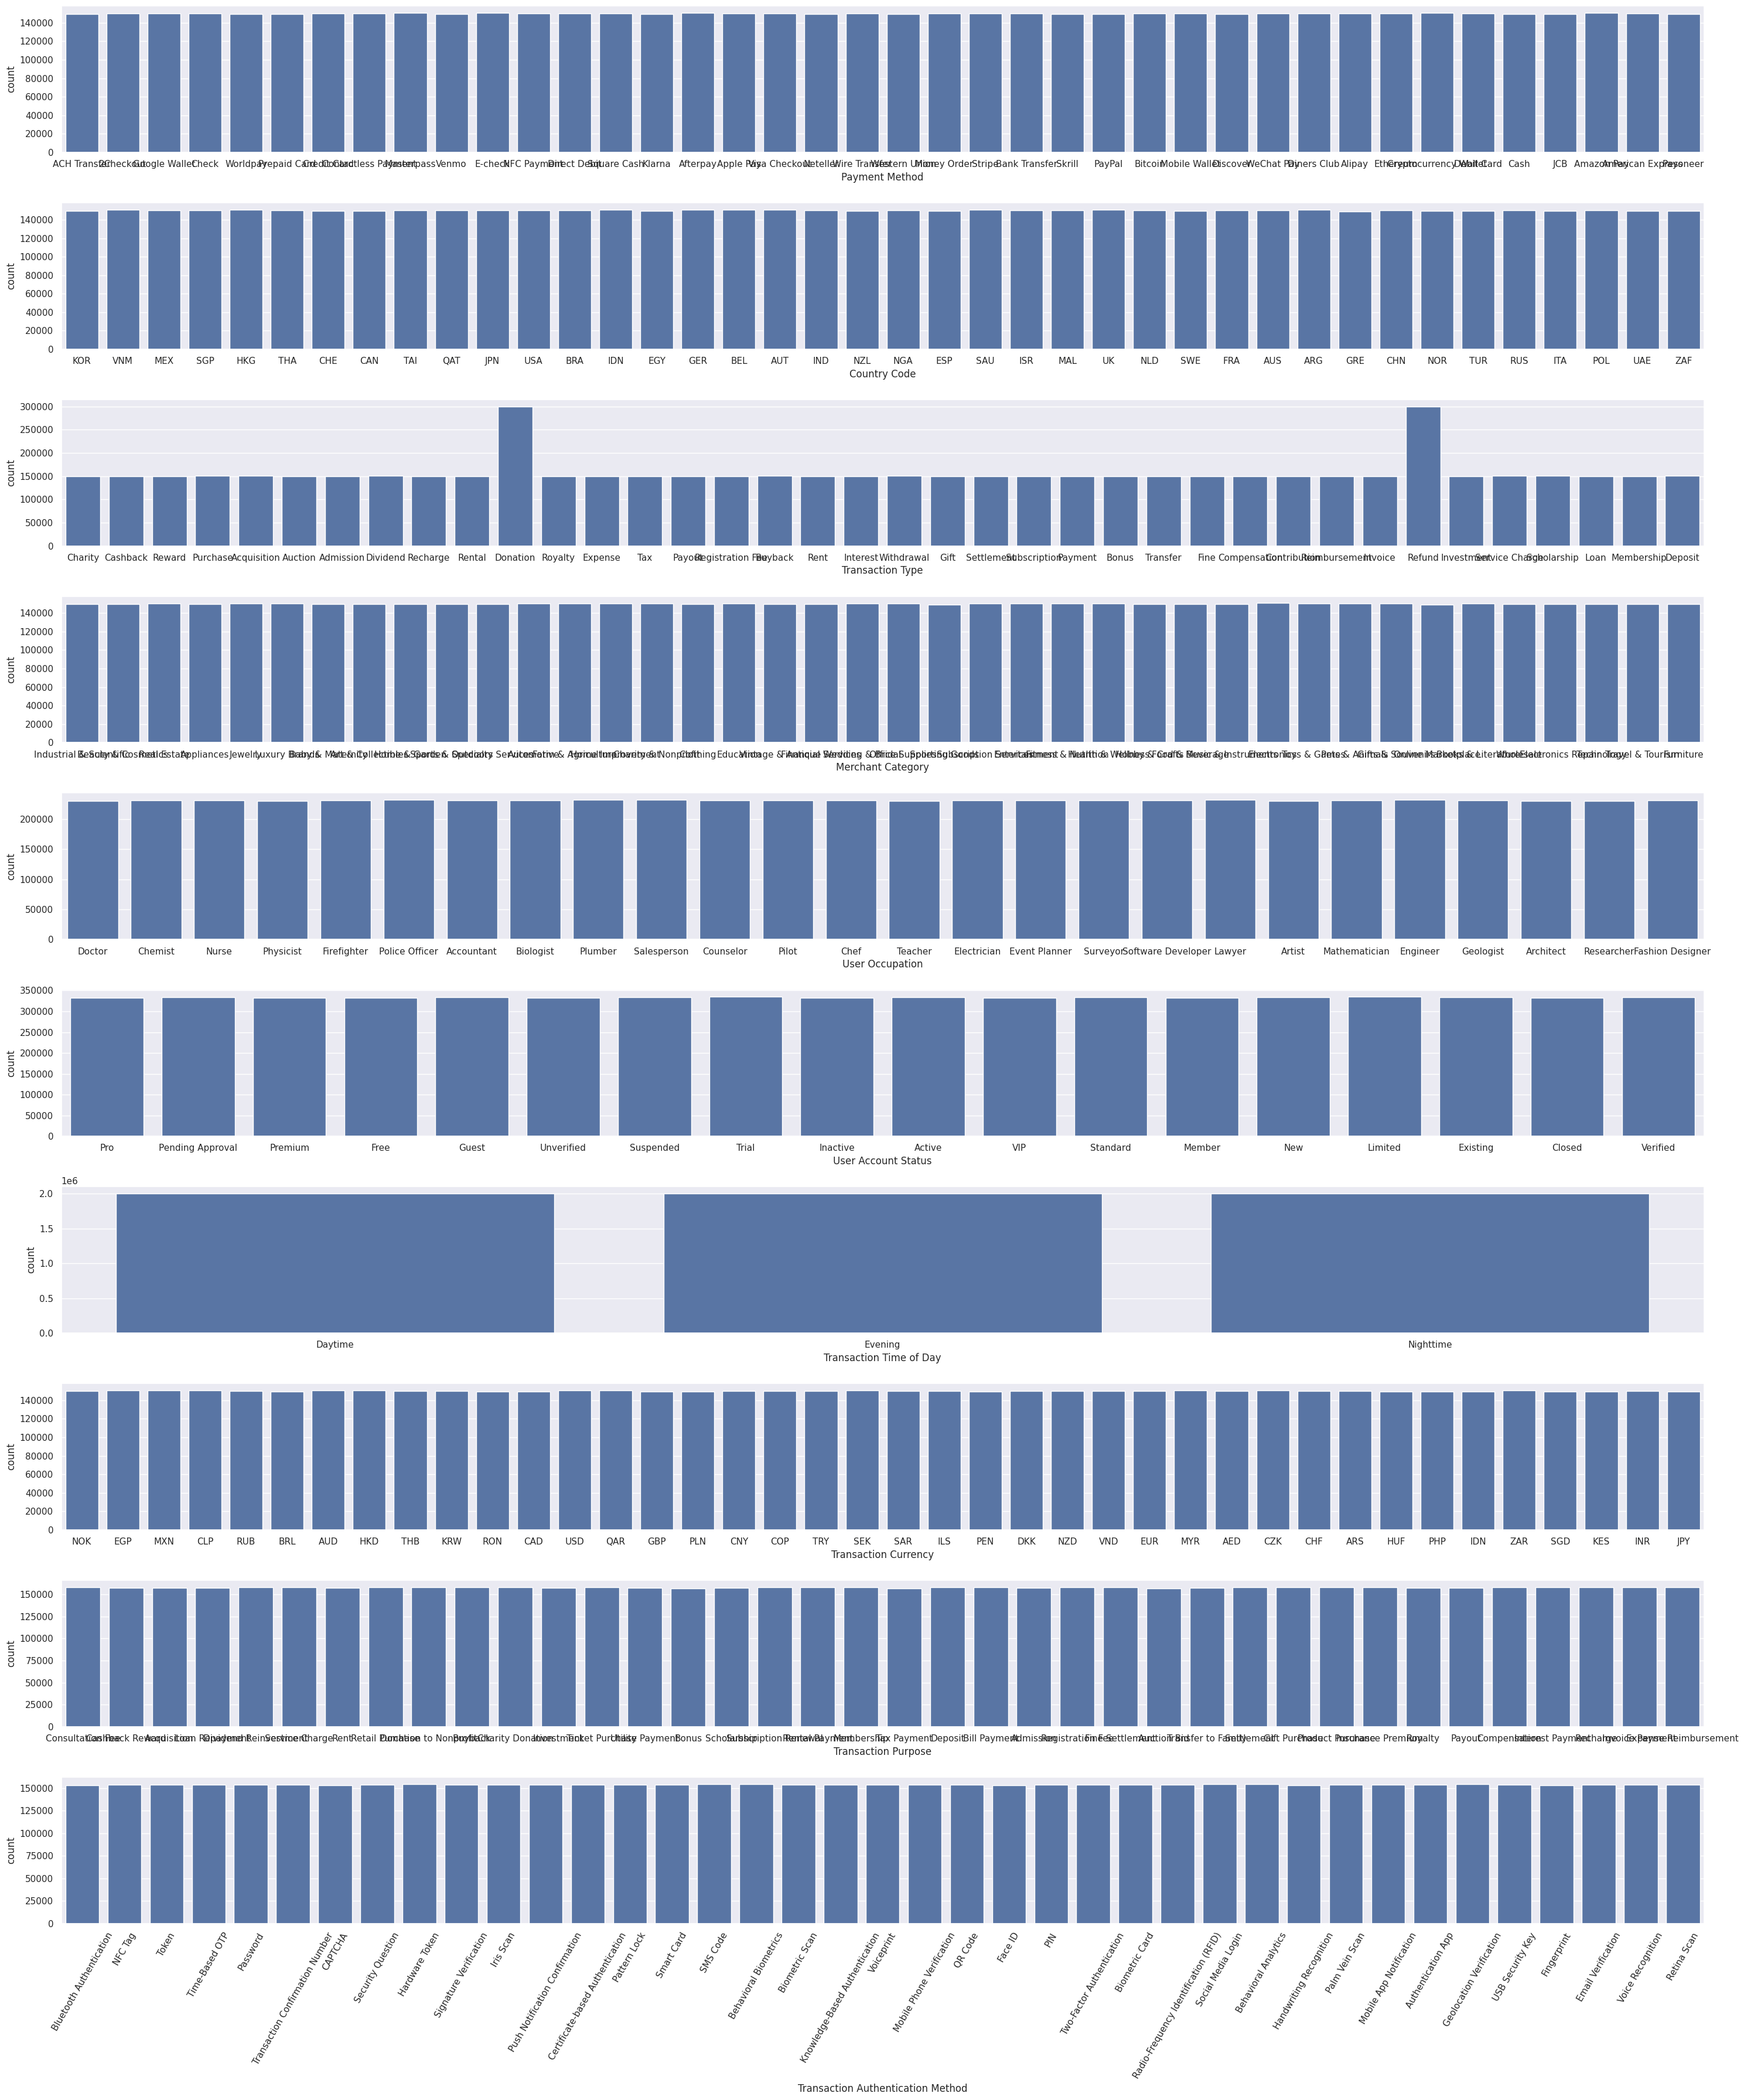

In [17]:
# Create subplots for each column
fig, ax = plt.subplots(nrows=10, figsize=[30, 36])

# Iterate through selected columns and create a count plot for each
sns.countplot(data=cat_df, x='Payment Method', color=sns.color_palette()[0], ax=ax[0])
sns.countplot(data=cat_df, x='Country Code', color=sns.color_palette()[0], ax=ax[1])
sns.countplot(data=cat_df, x='Transaction Type', color=sns.color_palette()[0], ax=ax[2])
sns.countplot(data=cat_df, x='Merchant Category', color=sns.color_palette()[0], ax=ax[3])
sns.countplot(data=cat_df, x='User Occupation', color=sns.color_palette()[0], ax=ax[4])
sns.countplot(data=cat_df, x='User Account Status', color=sns.color_palette()[0], ax=ax[5])
sns.countplot(data=cat_df, x='Transaction Time of Day', color=sns.color_palette()[0], ax=ax[6])
sns.countplot(data=cat_df, x='Transaction Currency', color=sns.color_palette()[0],  ax=ax[7])
sns.countplot(data=cat_df, x='Transaction Purpose', color=sns.color_palette()[0], ax=ax[8])
sns.countplot(data=cat_df, x='Transaction Authentication Method', color=sns.color_palette()[0], ax=ax[9])
plt.xticks(rotation=60)
plt.tight_layout();

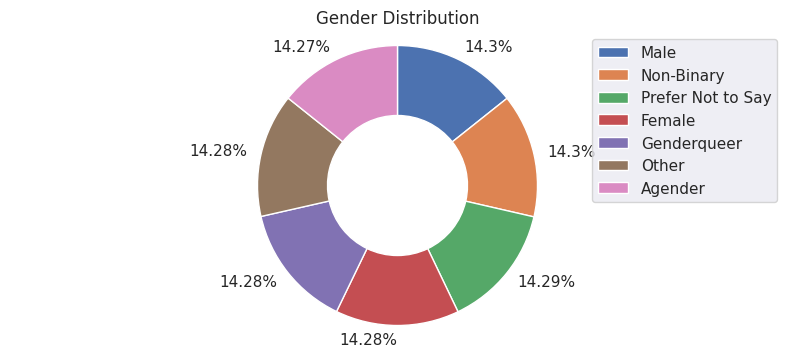

In [18]:
# Plot of Gender distribution
gendercount = round(cat_df['User Gender'].value_counts(normalize=True)*100,2)
plt.figure(figsize=(10, 4))
plt.pie(gendercount, labels=[f"{str(x)}%" for x in gendercount.values], startangle=90, counterclock = False, wedgeprops = {'width': 0.5});

plt.title('Gender Distribution', fontsize=12)
plt.legend(gendercount.index, loc='upper right')
plt.axis('equal');

#### Numerical Variable

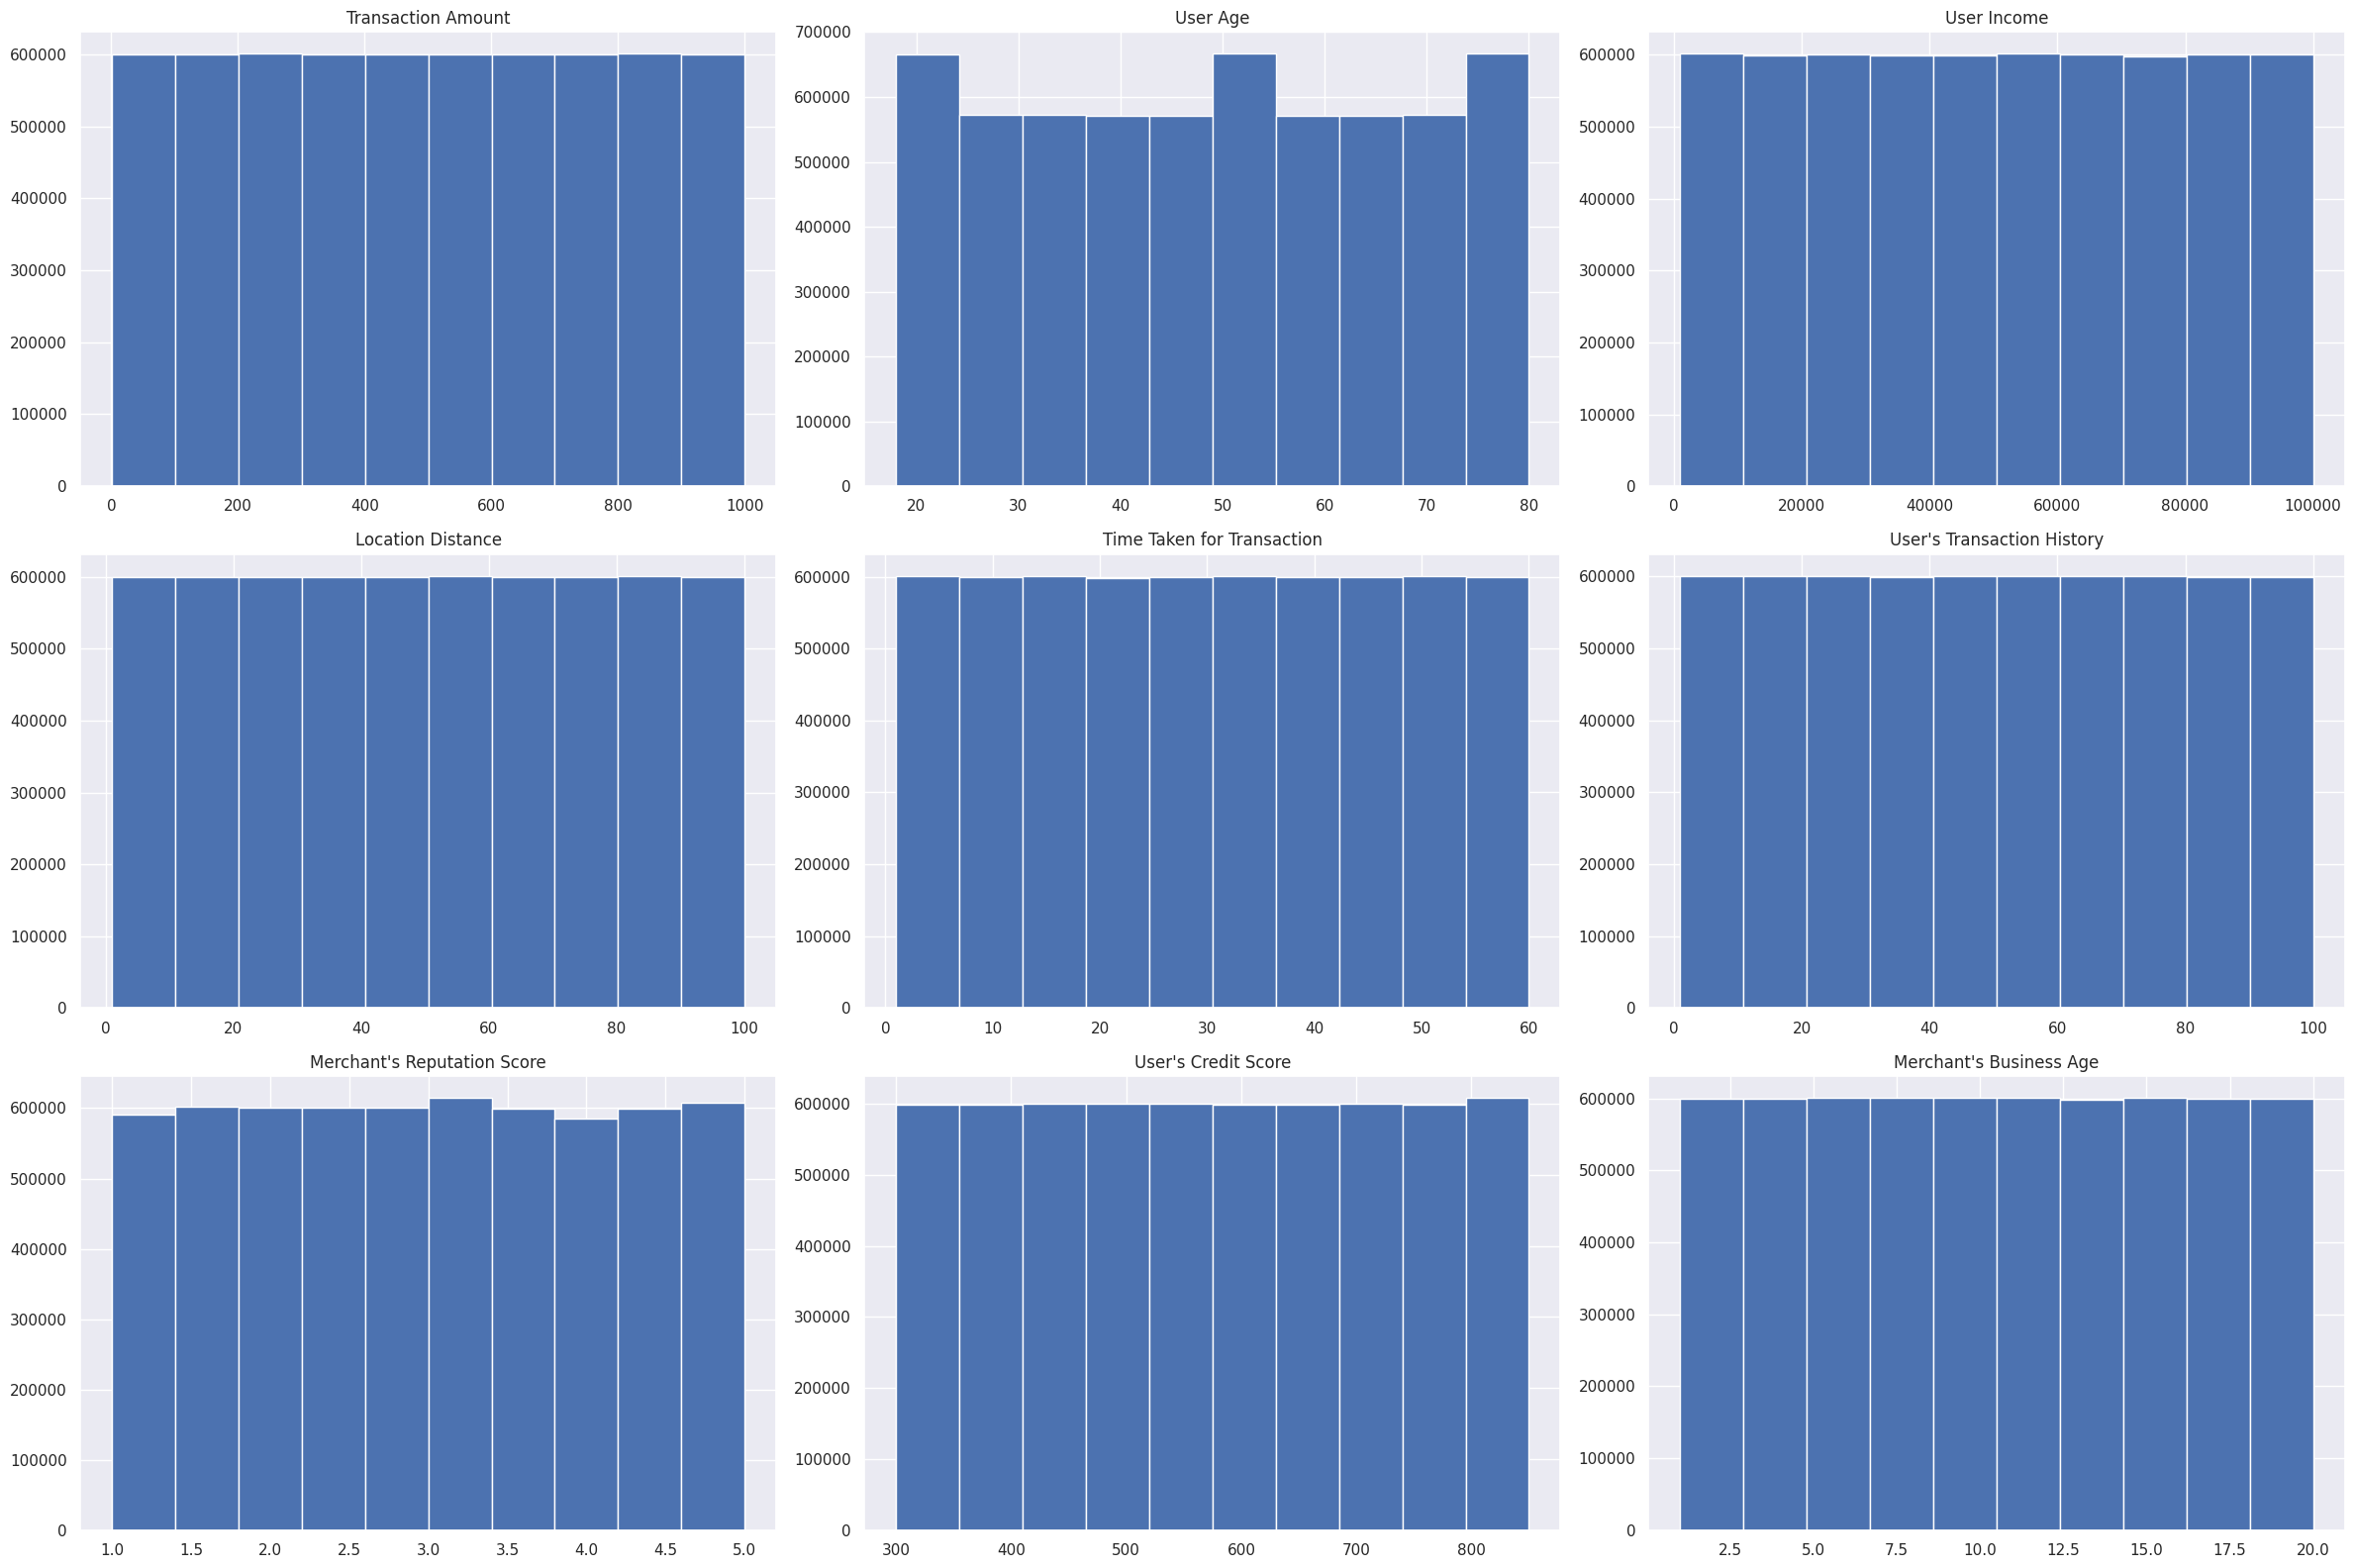

In [19]:
# Get numerical columns
numerical_df = df.select_dtypes(include=['int', 'float']).drop(columns=['Transaction ID', 'User ID','Merchant ID','Fraudulent Flag'])
numerical_df.hist(figsize=(24,16))
plt.tight_layout();

## Bivariate Analysis

#### Categorical

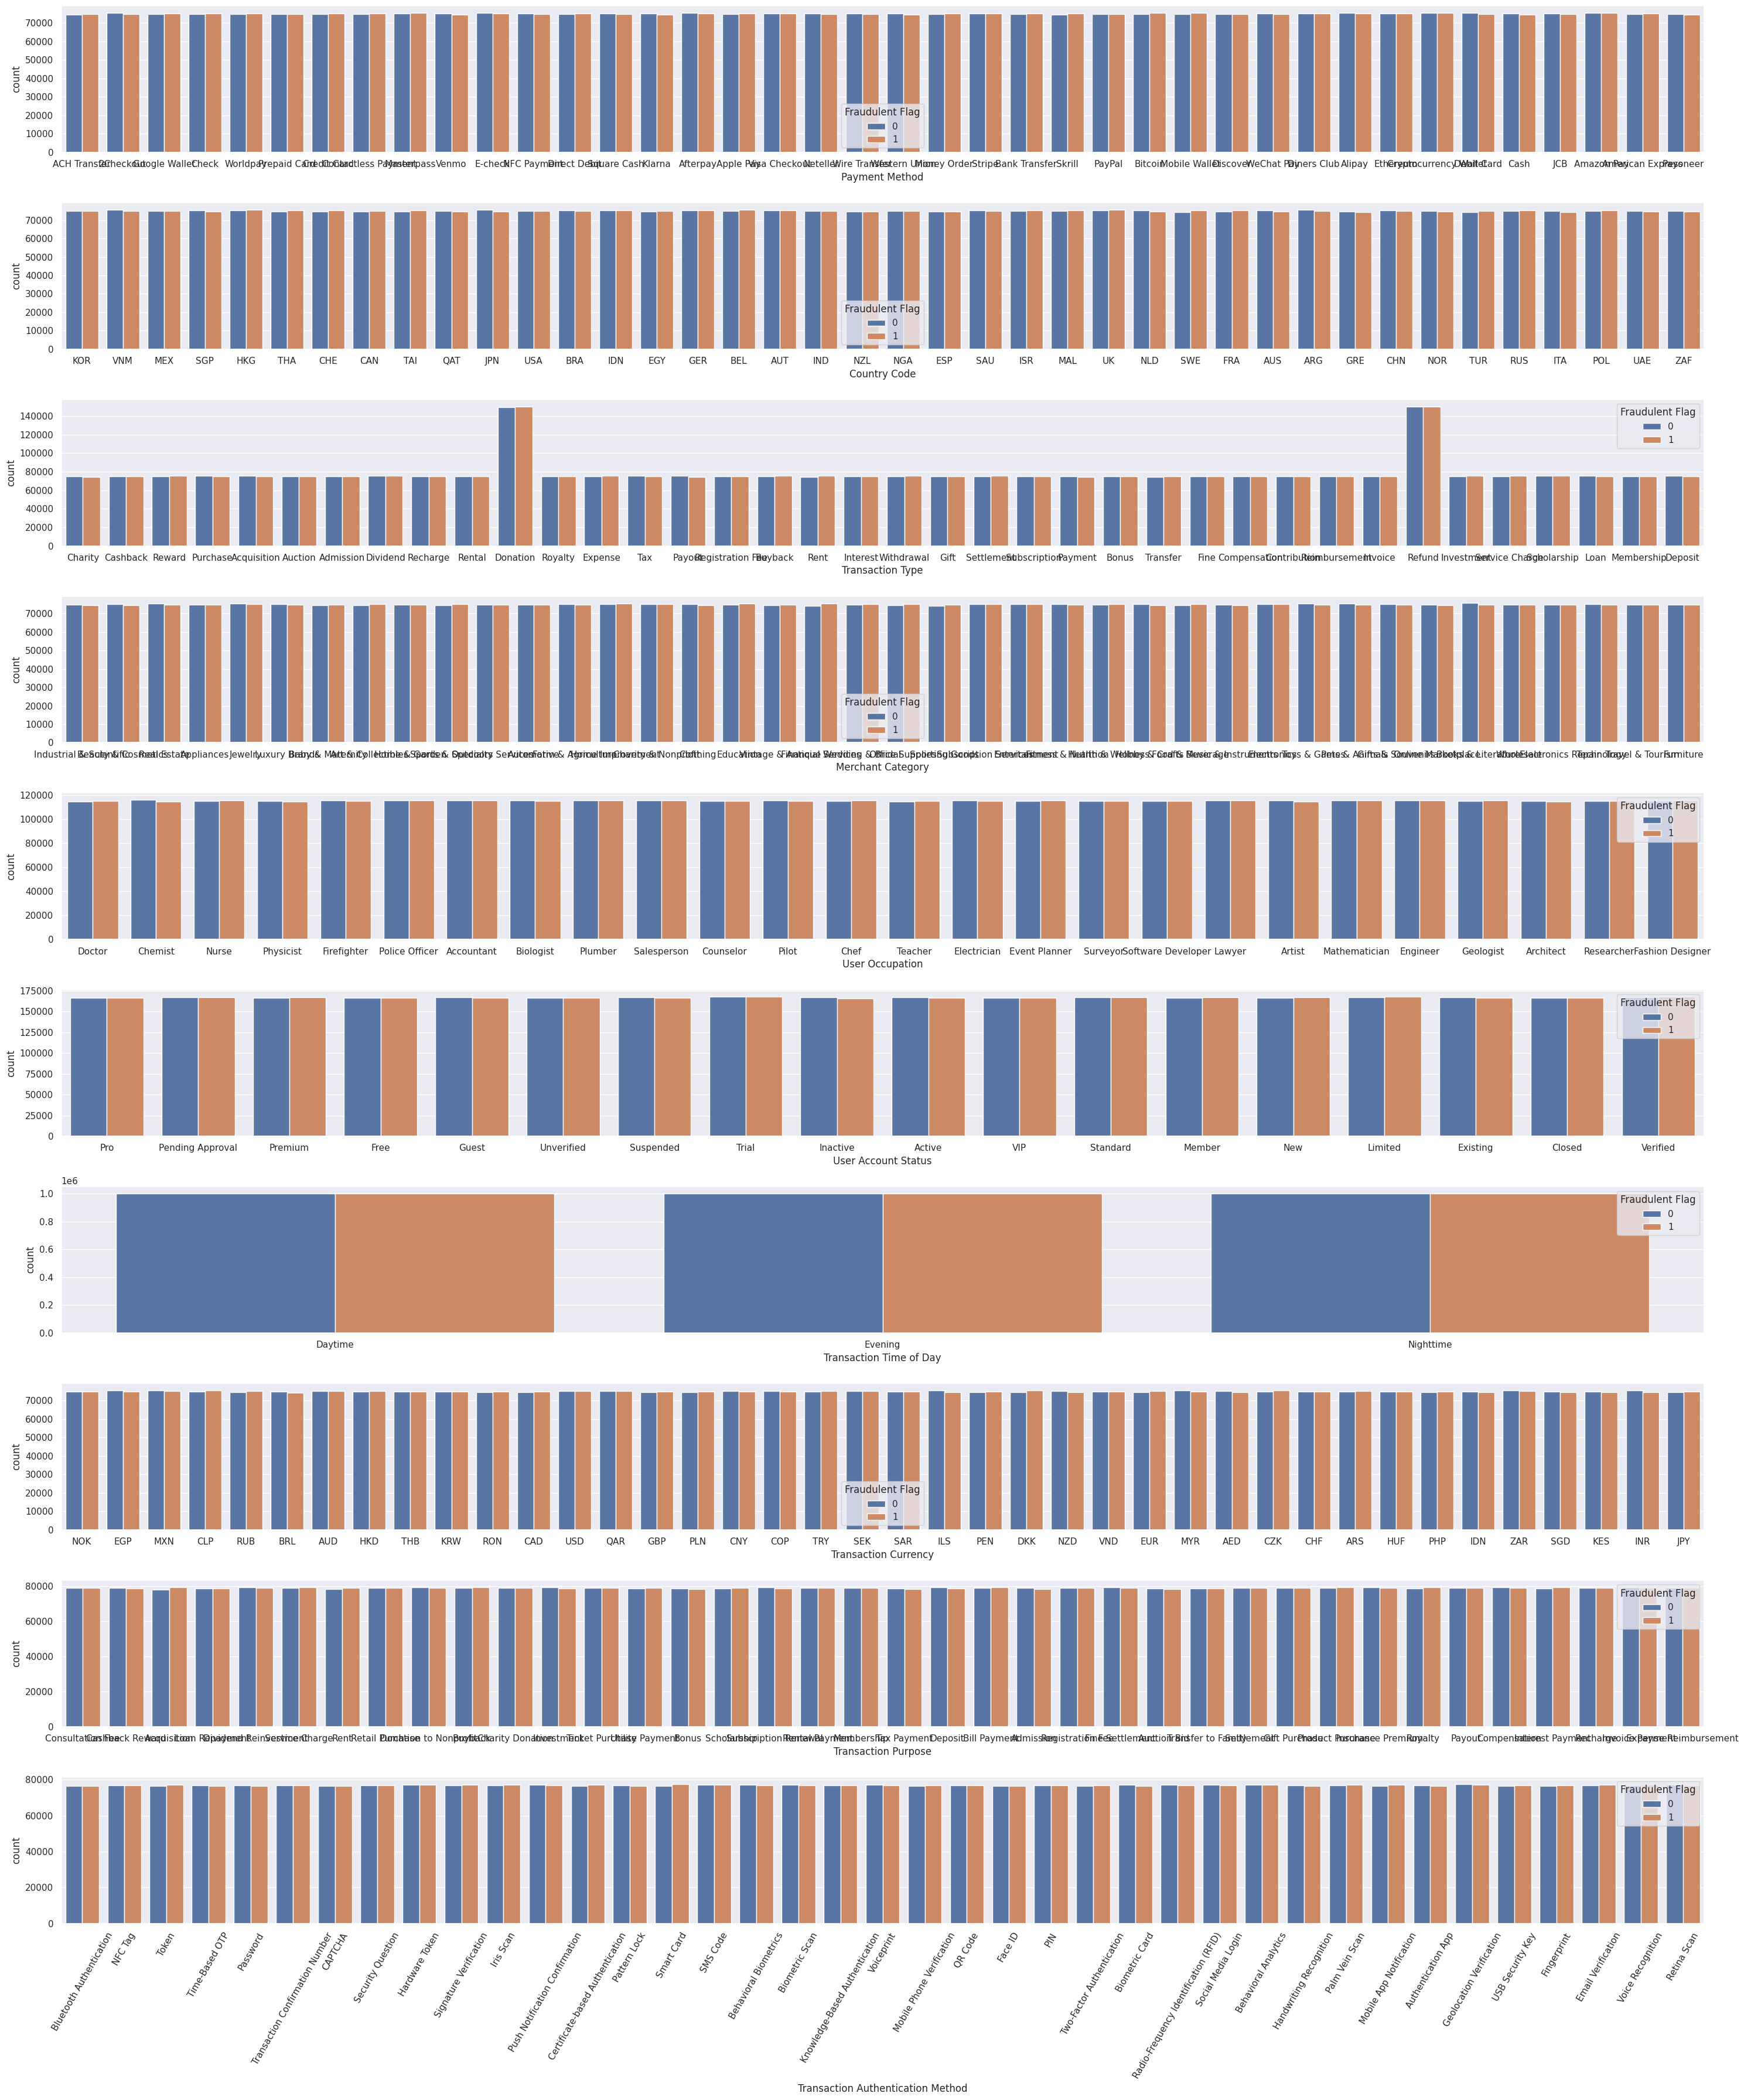

In [20]:
# Create subplots for each column
fig, ax = plt.subplots(nrows=10, figsize=[30, 36])

# Iterate through selected columns and create a count plot for each

sns.countplot(data=cat_df, x='Payment Method', hue=df['Fraudulent Flag'], ax=ax[0])
sns.countplot(data=cat_df, x='Country Code', hue=df['Fraudulent Flag'], ax=ax[1])
sns.countplot(data=cat_df, x='Transaction Type', hue=df['Fraudulent Flag'], ax=ax[2])
sns.countplot(data=cat_df, x='Merchant Category', hue=df['Fraudulent Flag'], ax=ax[3])
sns.countplot(data=cat_df, x='User Occupation', hue=df['Fraudulent Flag'], ax=ax[4])
sns.countplot(data=cat_df, x='User Account Status', hue=df['Fraudulent Flag'], ax=ax[5])
sns.countplot(data=cat_df, x='Transaction Time of Day', hue=df['Fraudulent Flag'], ax=ax[6])
sns.countplot(data=cat_df, x='Transaction Currency', hue=df['Fraudulent Flag'], ax=ax[7])
sns.countplot(data=cat_df, x='Transaction Purpose', hue=df['Fraudulent Flag'], ax=ax[8])
sns.countplot(data=cat_df, x='Transaction Authentication Method', hue=df['Fraudulent Flag'], ax=ax[9])
plt.xticks(rotation=60)
plt.tight_layout();

#### Numerical

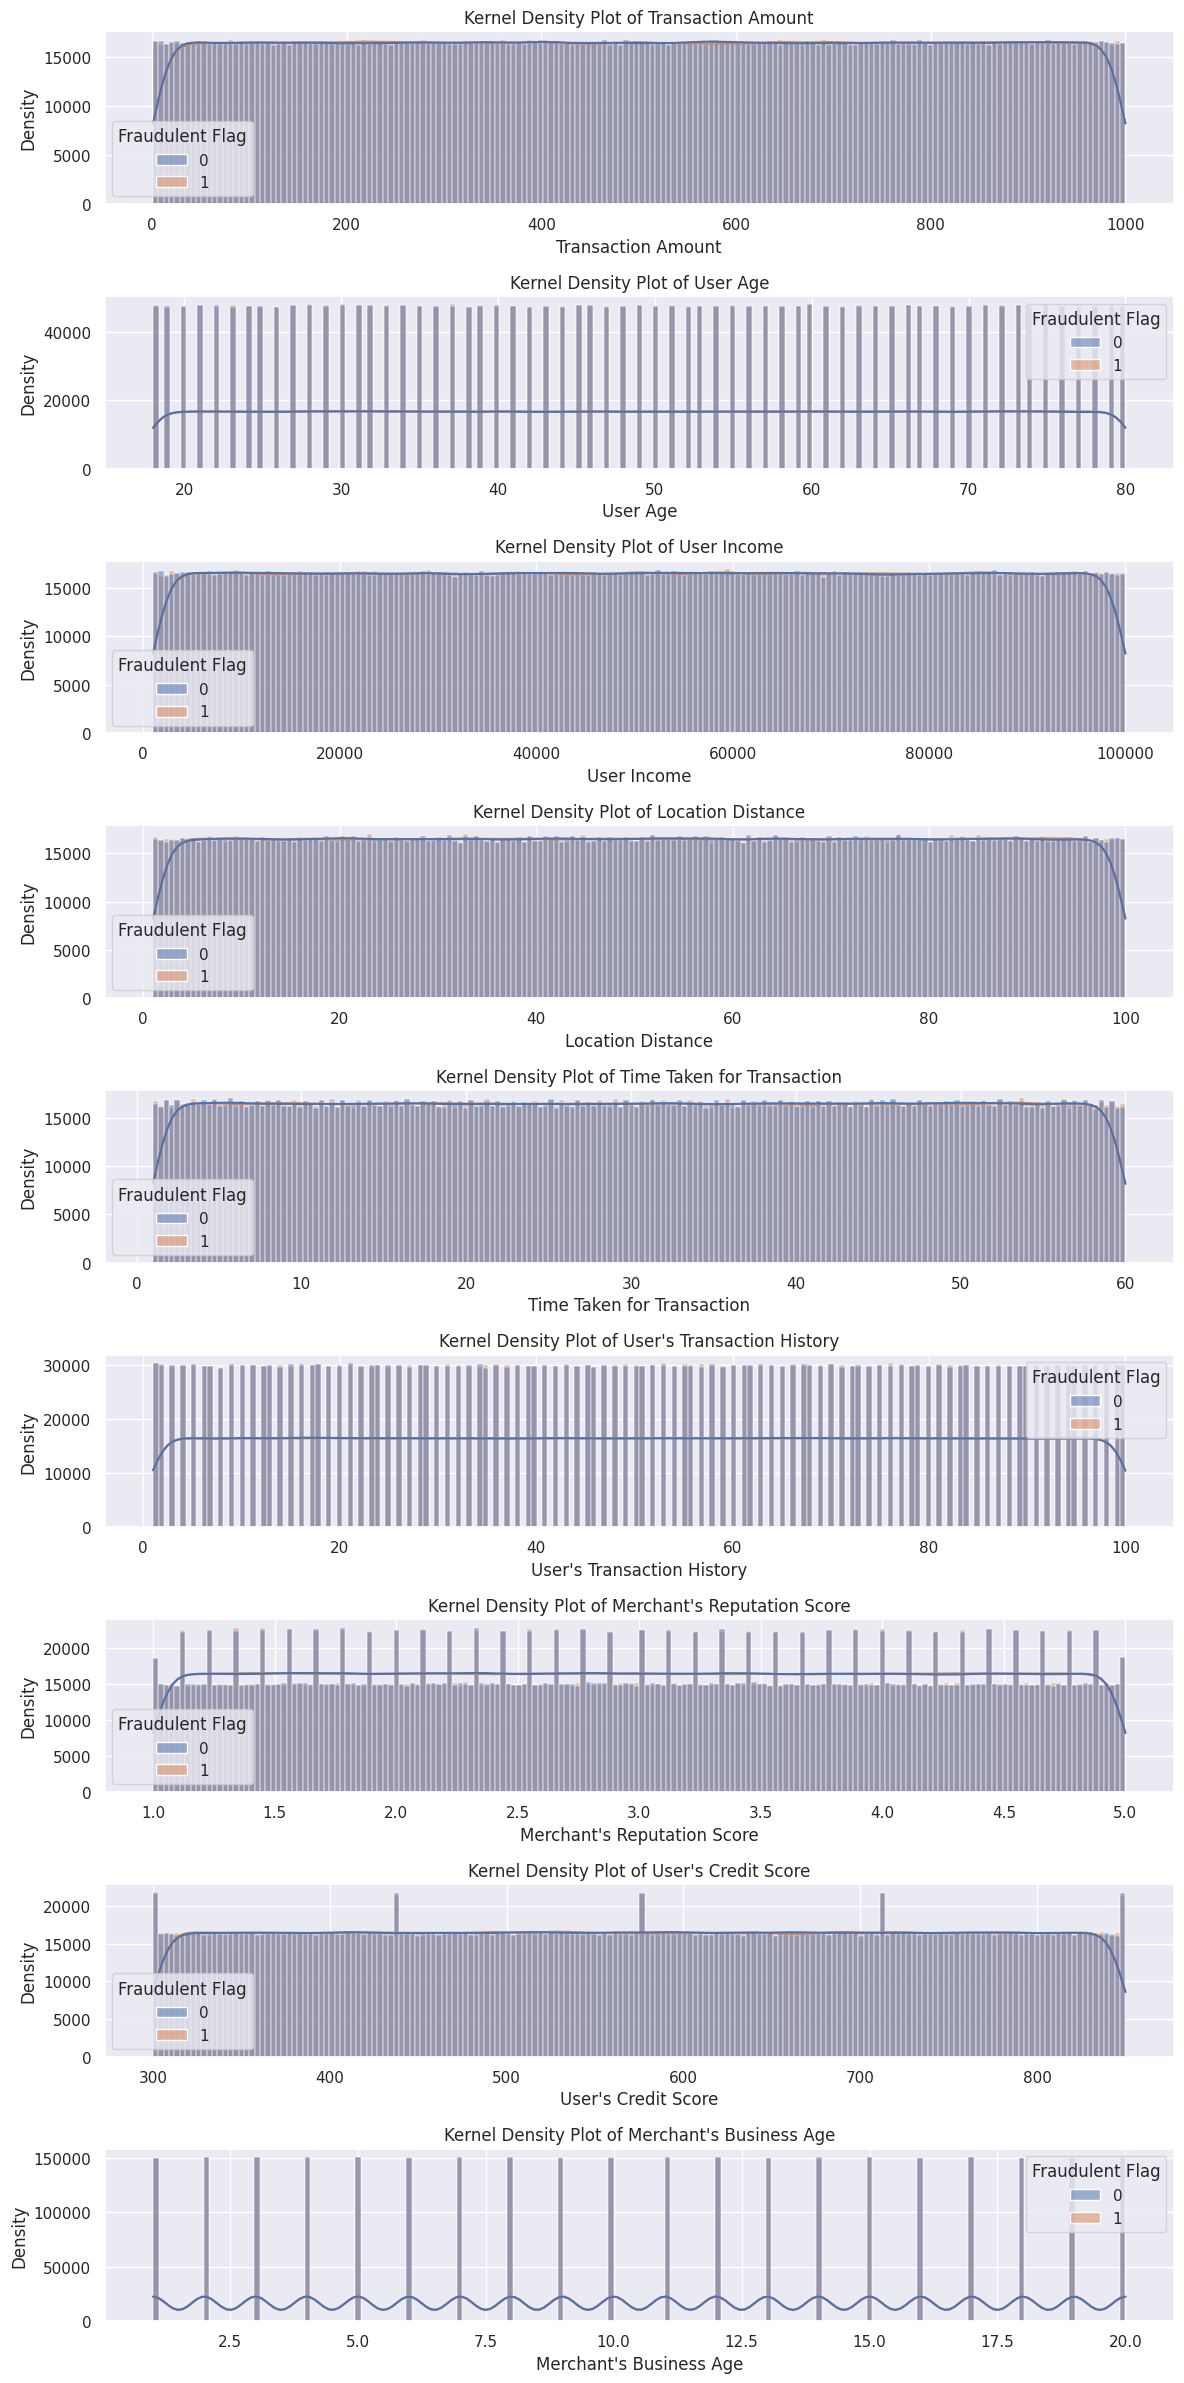

In [21]:

# Create subplots for each numerical column
fig, axs = plt.subplots(nrows=numerical_df.shape[1], figsize=[12, 24])

# Iterate through numerical columns and create a kernel density plot for each
for i, column in enumerate(numerical_df.columns):
    var = numerical_df[column]
    sns.histplot(data=numerical_df, x=var, hue=df['Fraudulent Flag'], ax=axs[i], kde=True, common_norm=False)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Density')
    axs[i].set_title(f'Kernel Density Plot of {column}')

plt.tight_layout()

In [22]:
df.groupby(["Fraudulent Flag", "Transaction Time of Day"]).count()

Transaction ID  User ID  \
Fraudulent Flag Transaction Time of Day                            
0               Daytime                          999496   999496   
                Evening                          999482   999482   
                Nighttime                       1001116  1001116   
1               Daytime                          999099   999099   
                Evening                         1000743  1000743   
                Nighttime                       1000064  1000064   

                                         Transaction Amount  \
Fraudulent Flag Transaction Time of Day                       
0               Daytime                              999496   
                Evening                              999482   
                Nighttime                           1001116   
1               Daytime                              999099   
                Evening                             1000743   
                Nighttime                           1000064   

                                         Transaction Date and Time  \
Fraudulent Flag Transaction Time of Day                              
0               Daytime                                     999496   
                Evening                                     999482   
                Nighttime                                  1001116   
1               Daytime                                     999099   
                Evening                                    1000743   
                Nighttime                                  1000064   

                                         Merchant ID  Payment Method  \
Fraudulent Flag Transaction Time of Day                                
0               Daytime                       999496          999496   
                Evening                       999482          999482   
                Nighttime                    1001116         1001116   
1               Daytime                       999099          999099   
                Evening                      1000743         1000743   
                Nighttime                    1000064         1000064   

                                         Country Code  Transaction Type  \
Fraudulent Flag Transaction Time of Day                                   
0               Daytime                        999496            999496   
                Evening                        999482            999482   
                Nighttime                     1001116           1001116   
1               Daytime                        999099            999099   
                Evening                       1000743           1000743   
                Nighttime                     1000064           1000064   

                                         Device Type  IP Address  \
Fraudulent Flag Transaction Time of Day                            
0               Daytime                       999496      999496   
                Evening                       999482      999482   
                Nighttime                    1001116     1001116   
1               Daytime                       999099      999099   
                Evening                      1000743     1000743   
                Nighttime                    1000064     1000064   

                                         Browser Type  Operating System  \
Fraudulent Flag Transaction Time of Day                                   
0               Daytime                        999496            999496   
                Evening                        999482            999482   
                Nighttime                     1001116           1001116   
1               Daytime                        999099            999099   
                Evening                       1000743           1000743   
                Nighttime                     1000064           1000064   

                                         Merchant Category  User Age  \
Fraudulent Flag Transaction Time o

In [23]:
df.groupby(["Fraudulent Flag", "User Gender"]).count()

Transaction ID  User ID  \
Fraudulent Flag User Gender                                  
0               Agender                    427683   427683   
                Female                     429264   429264   
                Genderqueer                428121   428121   
                Male                       428893   428893   
                Non-Binary                 429004   429004   
                Other                      428243   428243   
                Prefer Not to Say          428886   428886   
1               Agender                    428468   428468   
                Female                     427641   427641   
                Genderqueer                428727   428727   
                Male                       429405   429405   
                Non-Binary                 429056   429056   
                Other                      428311   428311   
                Prefer Not to Say          428298   428298   

                                   Transaction Amount  \
Fraudulent Flag User Gender                             
0               Agender                        427683   
                Female                         429264   
                Genderqueer                    428121   
                Male                           428893   
                Non-Binary                     429004   
                Other                          428243   
                Prefer Not to Say              428886   
1               Agender                        428468   
                Female                         427641   
                Genderqueer                    428727   
                Male                           429405   
                Non-Binary                     429056   
                Other                          428311   
                Prefer Not to Say              428298   

                                   Transaction Date and Time  Merchant ID  \
Fraudulent Flag User Gender                                                 
0               Agender                               427683       427683   
                Female                                429264       429264   
                Genderqueer                           428121       428121   
                Male                                  428893       428893   
                Non-Binary                            429004       429004   
                Other                                 428243       428243   
                Prefer Not to Say                     428886       428886   
1               Agender                               428468       428468   
                Female                                427641       427641   
                Genderqueer                           428727       428727   
                Male                                  429405       429405   
                Non-Binary                            429056       429056   
                Other                                 428311       428311   
                Prefer Not to Say                     428298       428298   

                                   Payment Method  Country Code  \
Fraudulent Flag User Gender                                       
0               Agender                    427683        427683   
                Female                     429264        429264   
                Genderqueer                428121        428121   
                Male                       428893        428893   
                Non-Binary                 429004        429004   
                Other                      428243        428243   
                Prefer Not to Say          428886        428886   
1               Agender                    428468        428468   
                Female                     427641        427641   
                Genderqueer                428727        428727   
                Male                       429405        429405   
                Non-Binar

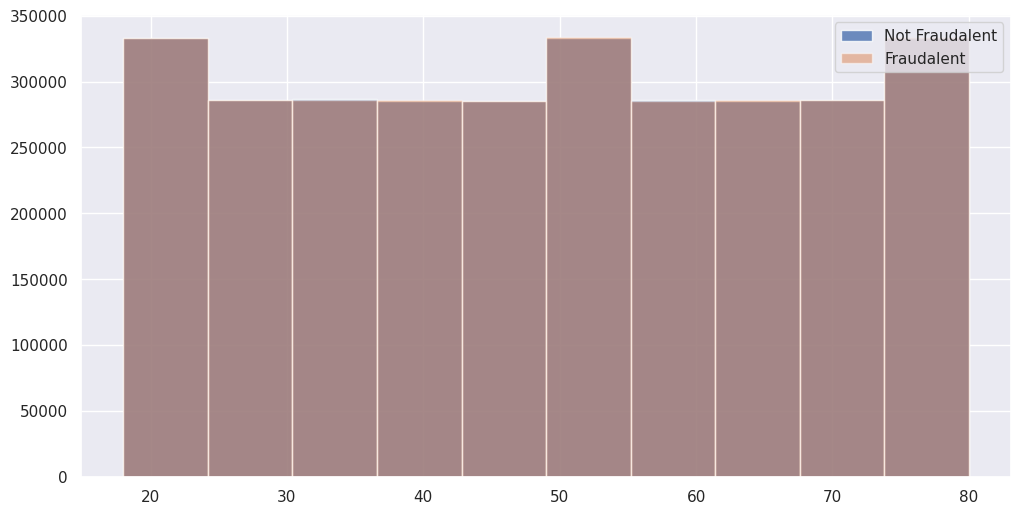

In [24]:
### Checking the Age Distribution with Fraudalent Flag
df['User Age'][df["Fraudulent Flag"] == 0].hist(alpha=0.8,label='Not Fraudalent')
df['User Age'][df["Fraudulent Flag"] == 1].hist(alpha=0.5,label='Fraudalent')
plt.legend();

## Multivariate Analysis

<ipython-input-25-a770ac27e057>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


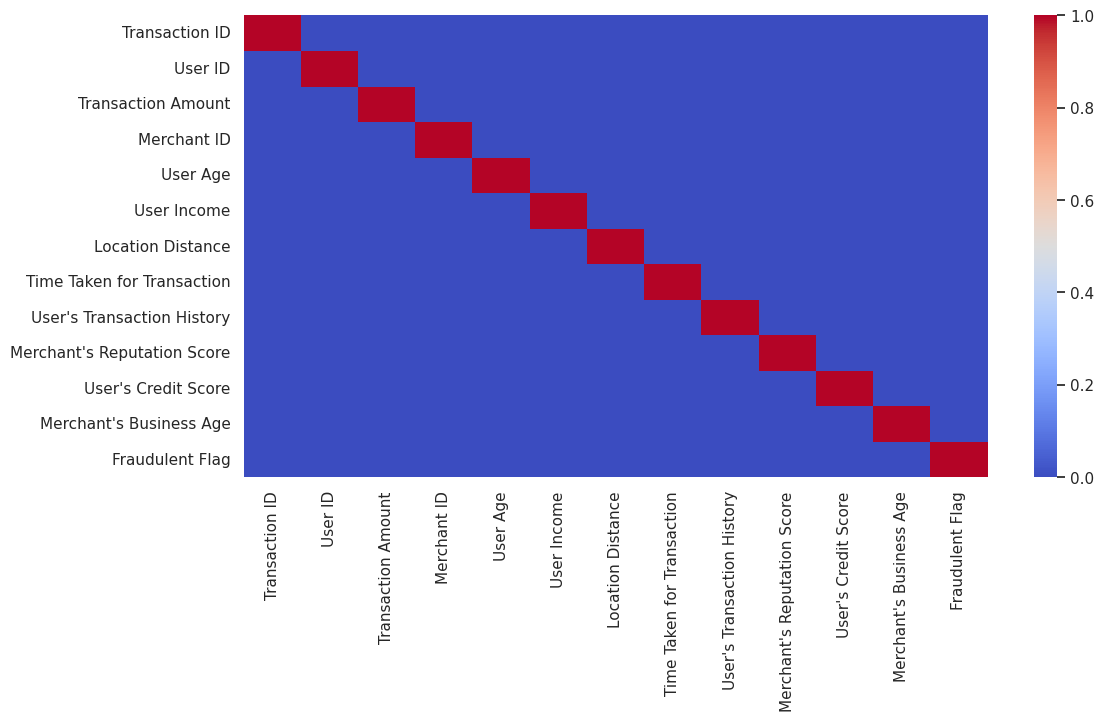

In [25]:
# Checking for multicolinearity among numerical columns
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm');

In [27]:
# sns.lineplot(data=df, x="Transaction Date and Time", y='Transaction Amount', hue='Fraudulent Flag');

## Feature Engineering

In [28]:
df.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,Links,Tizen,Industrial & Scientific,68,Doctor,66826.21,Prefer Not to Say,Pro,In Transit,9.34,24.22,Daytime,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,Beaker,Windows Server,Beauty & Cosmetics,22,Chemist,89356.71,Genderqueer,Pending Approval,Resolved,65.28,55.11,Daytime,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,Opera,Android,Real Estate,71,Nurse,58438.63,Male,Pro,Posted,44.05,53.84,Daytime,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,Konqueror,CentOS,Appliances,78,Nurse,3426.92,Agender,Premium,Closed,21.70,21.62,Daytime,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,Basilisk,Ubuntu,Jewelry,31,Physicist,53080.12,Male,Free,Refunded,56.63,53.71,Daytime,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1


In [29]:
# Extract day of the week (0 = Monday, 6 = Sunday)
df['DayOfWeek'] = df['Transaction Date and Time'].dt.dayofweek
# Extract month
df['Month'] = df['Transaction Date and Time'].dt.month
# Extract day of the month
df['DayOfMonth'] = df['Transaction Date and Time'].dt.day

In [30]:
day_mapping = {0: 'Monday',1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday',5: 'Saturday',6: 'Sunday'}

# Use the .map() function to create a new 'DayName' column
df['DayName'] = df['DayOfWeek'].map(day_mapping)

Friday       14.369483
Sunday       14.338717
Saturday     14.332850
Monday       14.256683
Tuesday      14.247317
Wednesday    14.234450
Thursday     14.220500
Name: DayName, dtype: float64


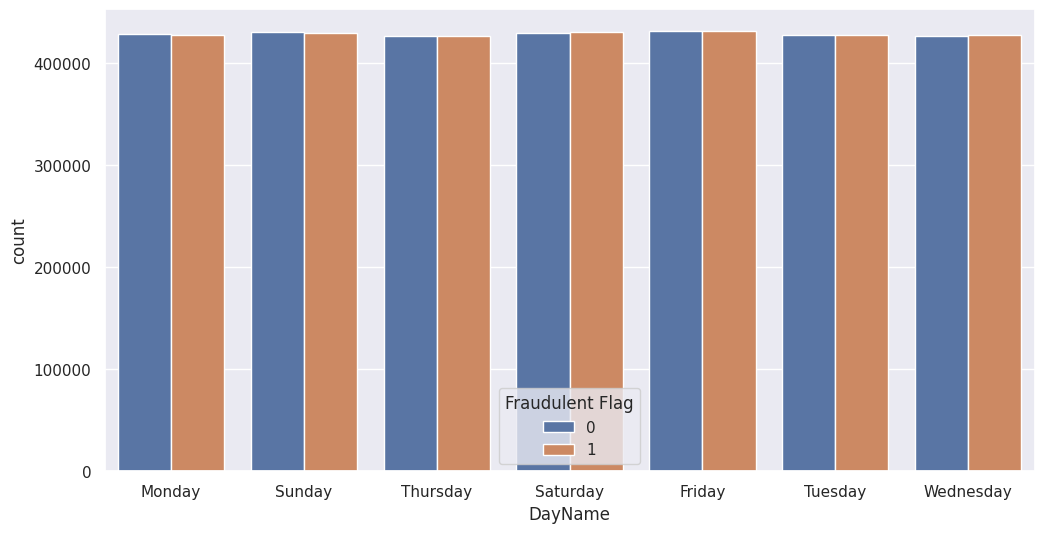

In [31]:
print(df['DayName'].value_counts(normalize=True)*100)
sns.countplot(df, x= "DayName", hue="Fraudulent Flag");

In [32]:
# Define a mapping dictionary for month names
month_mapping = {1: 'January',2: 'February',3: 'March',4: 'April',5: 'May',6: 'June',7: 'July',8: 'August',
    9: 'September',10: 'October',11: 'November',12: 'December'}
# Use the .map() function to create a new 'MonthName' column
df['MonthName'] = df['Month'].map(month_mapping)

May          9.910300
March        9.890533
January      9.874617
July         9.757467
April        9.591667
June         9.565100
February     8.915317
August       6.584767
December     6.583917
October      6.561833
November     6.389683
September    6.374800
Name: MonthName, dtype: float64


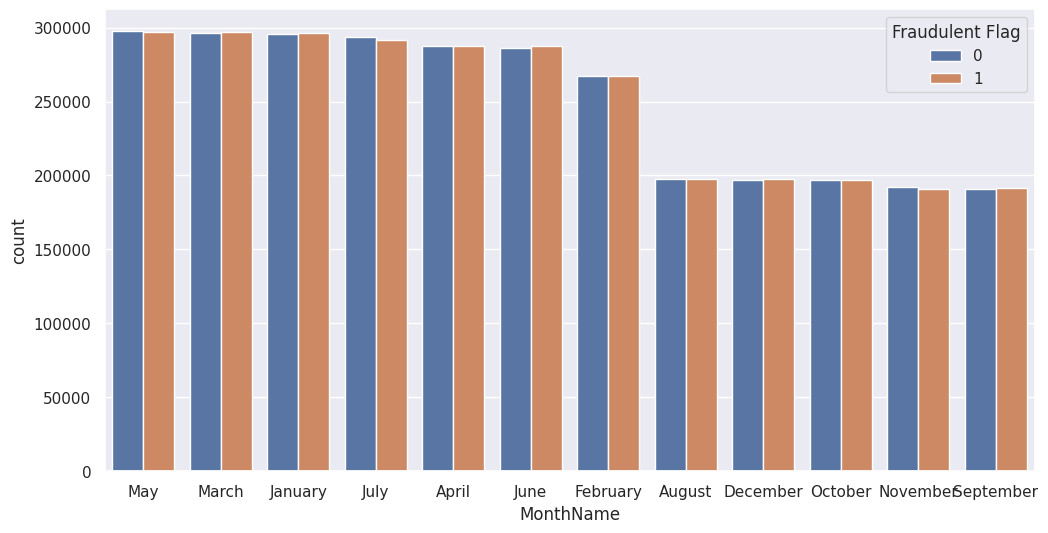

In [33]:
print(df['MonthName'].value_counts(normalize=True)*100)
sns.countplot(df, x= "MonthName", hue="Fraudulent Flag", order=df['MonthName'].value_counts().index);

In [34]:
# Drop columns
df.drop(columns=['Transaction ID', 'User ID','Merchant ID','Transaction Date and Time','DayName', 'MonthName'], inplace=True)

In [35]:
# Encode categorical variable
label_encoder = LabelEncoder()

# Iterate through the specified columns and encode each one
for column in df.select_dtypes(include=['object']):
    df[column] = label_encoder.fit_transform(df[column])

In [36]:
df.head()

,Transaction Amount,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag,DayOfWeek,Month,DayOfMonth
0,163.08,1,19,6,10,4533349,15,27,22,68,7,66826.21,6,11,19,9.34,24.22,0,26,2.71,37,24,9,343,3,3,5,0,0,1,2
1,430.74,0,38,5,18,4445294,2,33,4,22,5,89356.71,2,9,32,65.28,55.11,0,60,3.95,18,11,6,688,10,13,18,1,6,9,12
2,415.74,20,21,29,34,3779806,21,1,29,71,16,58438.63,3,11,26,44.05,53.84,0,81,3.81,24,22,0,371,27,7,33,1,3,1,12
3,565.89,10,30,22,16,2983424,14,6,0,78,16,3426.92,0,10,6,21.70,21.62,0,18,2.67,30,6,20,687,24,15,32,1,5,2,27
4,955.49,39,13,0,27,1757110,1,28,23,31,17,53080.12,3,3,30,56.63,53.71,0,98,3.19,14,31,11,605,20,17,21,1,5,9,24


In [37]:
df.shape

(6000000, 31)